# MLP Classifier  

`MNIST dataset`  
[video link](https://youtu.be/lvS2ZHJeyng)  

**Imports**  

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, pair_confusion_matrix, classification_report

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedShuffleSplit

In [3]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

**Load dataset**  

In [4]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X.to_numpy()
y = y.to_numpy()
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [6]:
# Flatten each input image into a vector of length 784
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

# Normalizing
X_train = X_train / 255
X_test = X_test / 255

In [7]:
print("Shape of training data after flattening", X_train.shape)
print("Shape of testing data after flattening", X_test.shape)

Shape of training data after flattening (60000, 784)
Shape of testing data after flattening (10000, 784)


In [8]:
print(f"Shape of training data: {X_train.shape}")
print(f"Shape of training labels: {y_train.shape}")
print(f"Shape of testing data: {X_test.shape}")
print(f"Shape of testing labels: {y_test.shape}")

Shape of training data: (60000, 784)
Shape of training labels: (60000,)
Shape of testing data: (10000, 784)
Shape of testing labels: (10000,)


## Fit MLPClassifier on MNIST dataset  

Let us train a MLP classifier with one hidden layer having 128 neurons.  

In [9]:
mlpc = MLPClassifier(hidden_layer_sizes=(128,))
mlpc.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(128,))

In [10]:
cv_score = cross_val_score(mlpc, X_train, y_train.ravel(), cv=cv)
print(f"Training Accuracy: {cv_score.mean()*100:.2f} %")

Training Accuracy: 97.67 %


In [11]:
# prediction probabilities of test data  
mlpc.predict_proba(X_test[:5])

array([[1.26743359e-13, 3.07609964e-17, 1.37432832e-11, 1.94231902e-06,
        5.11266932e-19, 7.11450050e-14, 8.44093912e-21, 9.99997767e-01,
        2.16781015e-11, 2.90222517e-07],
       [1.04327141e-17, 2.06819327e-12, 9.99999999e-01, 2.79543144e-13,
        7.06734784e-33, 3.65978207e-14, 3.92180353e-17, 2.59637711e-21,
        8.24495664e-10, 1.15044516e-22],
       [1.51543245e-12, 9.99880676e-01, 3.20261538e-06, 1.18800844e-09,
        4.56913368e-09, 5.65794692e-11, 4.48108987e-10, 1.58369884e-06,
        1.14530924e-04, 1.51782309e-11],
       [1.00000000e+00, 4.67880924e-25, 3.45762634e-14, 7.13226352e-16,
        1.75715825e-21, 8.15907767e-18, 9.38191770e-14, 7.45916106e-13,
        1.53477078e-26, 1.00665796e-12],
       [1.26223790e-12, 1.53972272e-19, 3.20028074e-11, 3.27667617e-17,
        9.98356118e-01, 2.56682339e-15, 3.15239276e-11, 9.59732004e-12,
        8.72867818e-13, 1.64388143e-03]])

In [12]:
# prediction class labels of test data
y_pred = mlpc.predict(X_test)

In [13]:
print(f"Train accuracy: {accuracy_score(y_train, mlpc.predict(X_train))*100:.2f} %")
print(f"Test accuracy: {accuracy_score(y_test, y_pred)*100:.2f} %")

Train accuracy: 100.00 %
Test accuracy: 98.14 %


### Confusion matrix plot  

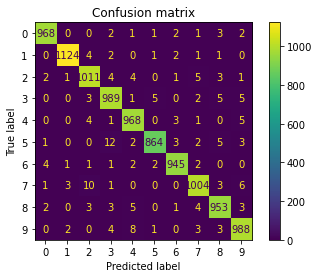

In [14]:
# visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion matrix')
plt.show()

In [15]:
CR = classification_report(y_test, y_pred)
print(f"Classification report \n")
print(CR)

Classification report 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.99      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### Plot of test data along with predicted class labels  

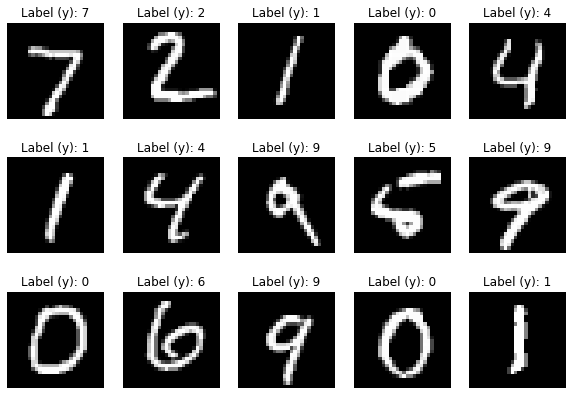

In [16]:
# Plotting some test samples
fig = plt.figure(figsize=(10,7))
for i in range(15):
    ax = fig.add_subplot(3, 5, i+1)
    ax.imshow(X_test[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    ax.set_title(f'Label (y): {y_pred[i]}')
    plt.axis('off')

### Visualization of multilayer perceptron weights in hidden layer  

* Looking at the learned coefficients of a neural network can provide insight into the learning behaviour.  
* The input data consists 784 features in the dataset.  
* We have used one hidden layer with 128 neurons. Therefore, weight matrix has the shape (784, 128).  
* We can therefore visualize a single column of the weight matrix as a 28*28 pixel image.  

In [17]:
w = mlpc.coefs_
w = np.array(w[0])
w.shape

(784, 128)

In [18]:
w1 = np.array(w[:, 0])
w1.shape

(784,)

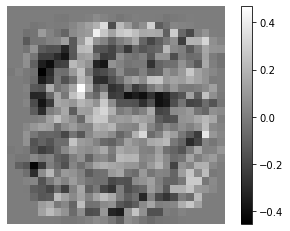

In [19]:
w_matrix = w1.reshape(28, 28)
fig = plt.figure()
plt.imshow(w_matrix, cmap='gray')
plt.grid(False)
plt.axis(False)
plt.colorbar()
plt.show()

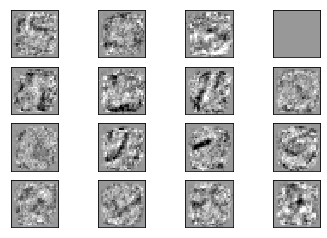

In [20]:
fig, axes = plt.subplots(4, 4)
vmin, vmax = mlpc.coefs_[0].min(), mlpc.coefs_[0].max()
for coef, ax in zip(mlpc.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray,
                vmin=0.5 * vmin, vmax=0.5 * vmax)

    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

Text(0.5, 1.0, 'Loss curve')

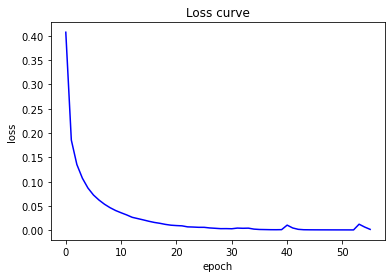

In [21]:
# Plot loss curve
plt.plot(mlpc.loss_curve_, 'b-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss curve')